# Comparing GNINA against real data

/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


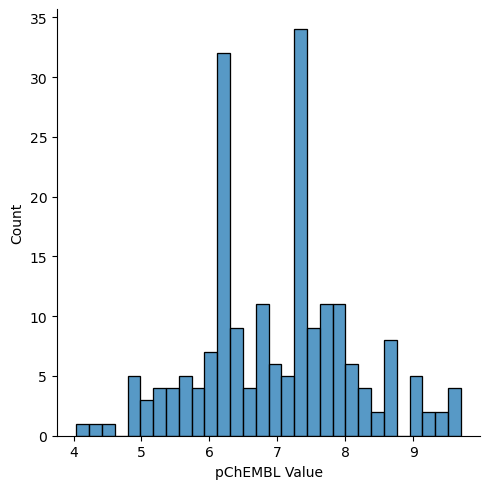

In [43]:
import pandas as pd

df = pd.read_csv('../../dgym-data/chembl_test_igf1r.tsv', sep='\t')
df = df.dropna(subset=['pChEMBL Value'])
sample = df.sample(200)

sns.displot(sample['pChEMBL Value'], bins=30)

Dock molecules.

In [45]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

In [48]:
import os

path = '../../dgym-data/'

dockstring_dir = f'{path}/dockstring_targets/'
files = os.listdir(dockstring_dir)
configs = sorted([f for f in files if 'conf' in f])
targets = sorted([f for f in files if 'target' in f])

idx = 30
with open(dockstring_dir + configs[idx], 'r') as f:
    config_ = f.readlines()
    config_ = [c.replace('\n', '') for c in config_]
    config_ = [c.split(' = ') for c in config_ if c]
    config_ = {c[0]: float(c[1]) for c in config_}

target = targets[idx]
name = target.split('_')[0]

config_.update({
    'size_x': 15,
    'size_y': 15,
    'size_z': 15,
})

from dgym.envs.oracle import DockingOracle, NeuralOracle, NoisyOracle
from dgym.envs.utility import ClassicUtilityFunction

config = {
    'search_mode': 'balanced',
    'scoring': 'gnina',
    'seed': 5,
    **config_
}

# Create noiseless evaluators
docking_oracle = DockingOracle(
    f'{name} affinity',
    receptor_path=f'{dockstring_dir}/{target}',
    config=config
)

In [52]:
deck = dg.collection.Collection([dg.molecule.Molecule(s) for s in sample['Smiles']])

In [60]:
scores = docking_oracle(deck)

In [75]:
docking_oracle([deck[-1]])

[6.610355167141401]

In [77]:
sample['pChEMBL Value'][1309]

4.9

(4.0, 8.6)

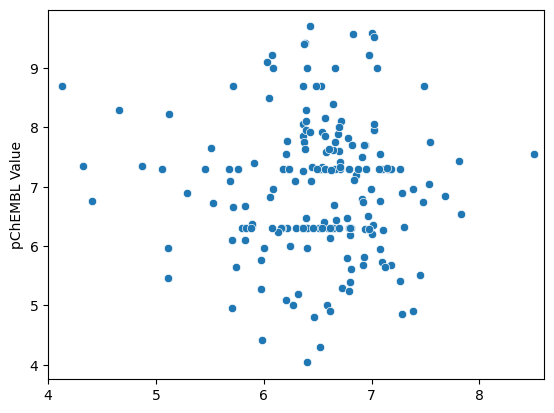

In [81]:
import matplotlib.pyplot as plt

sns.scatterplot(
    x=scores,
    y=sample['pChEMBL Value']
)

plt.xlim(4, 8.6)

In [82]:
from scipy.stats import pearsonr

pearsonr(scores, sample['pChEMBL Value'].tolist())

PearsonRResult(statistic=-0.15441410814617035, pvalue=0.02902341668431438)